In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pickle
#pip install -r requirements.txt

Extracting Dataset

In [2]:
df = pd.read_csv('dataset/train.csv')
df.head()

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
0,121610,7309831550,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,NaN,sedan,black,ga,34.139588,-83.971135,2021-04-20T11:46:13-0400,7995
1,395646,7317007429,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,NaN,SUV,black,wa,47.756950,-122.212230,2021-05-04T16:16:32-0700,14999
2,236366,7309202024,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,NaN,sedan,NaN,nc,34.209703,-77.843995,2021-04-19T10:07:58-0400,5995
3,66001,7306341714,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,NaN,SUV,NaN,ca,33.811000,-117.849300,2021-04-13T13:05:06-0700,0
4,320855,7307880118,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,full-size,SUV,silver,pa,40.143550,-76.597071,2021-04-16T15:22:02-0400,7995


Creating Dataframe with only needed columns

In [3]:
car_df = df[['id','year','manufacturer','model','fuel','odometer','title_status','condition','type','transmission','drive','state','posting_date','price']].copy(deep = True)

EDA SECTION

In [4]:
print(car_df.describe())

                 id           year      odometer         price
count  2.901290e+05  290129.000000  2.901290e+05  2.901290e+05
mean   7.311503e+09    2011.359082  9.764241e+04  5.193300e+04
std    4.378450e+06       9.149422  2.058970e+05  9.591680e+06
min    7.301583e+09    1900.000000  0.000000e+00  0.000000e+00
25%    7.308154e+09    2008.000000  3.800000e+04  5.991000e+03
50%    7.312664e+09    2014.000000  8.561500e+04  1.399000e+04
75%    7.315255e+09    2017.000000  1.334360e+05  2.650000e+04
max    7.317101e+09    2022.000000  1.000000e+07  3.736929e+09


Manufacturer

<Axes: xlabel='price', ylabel='manufacturer'>

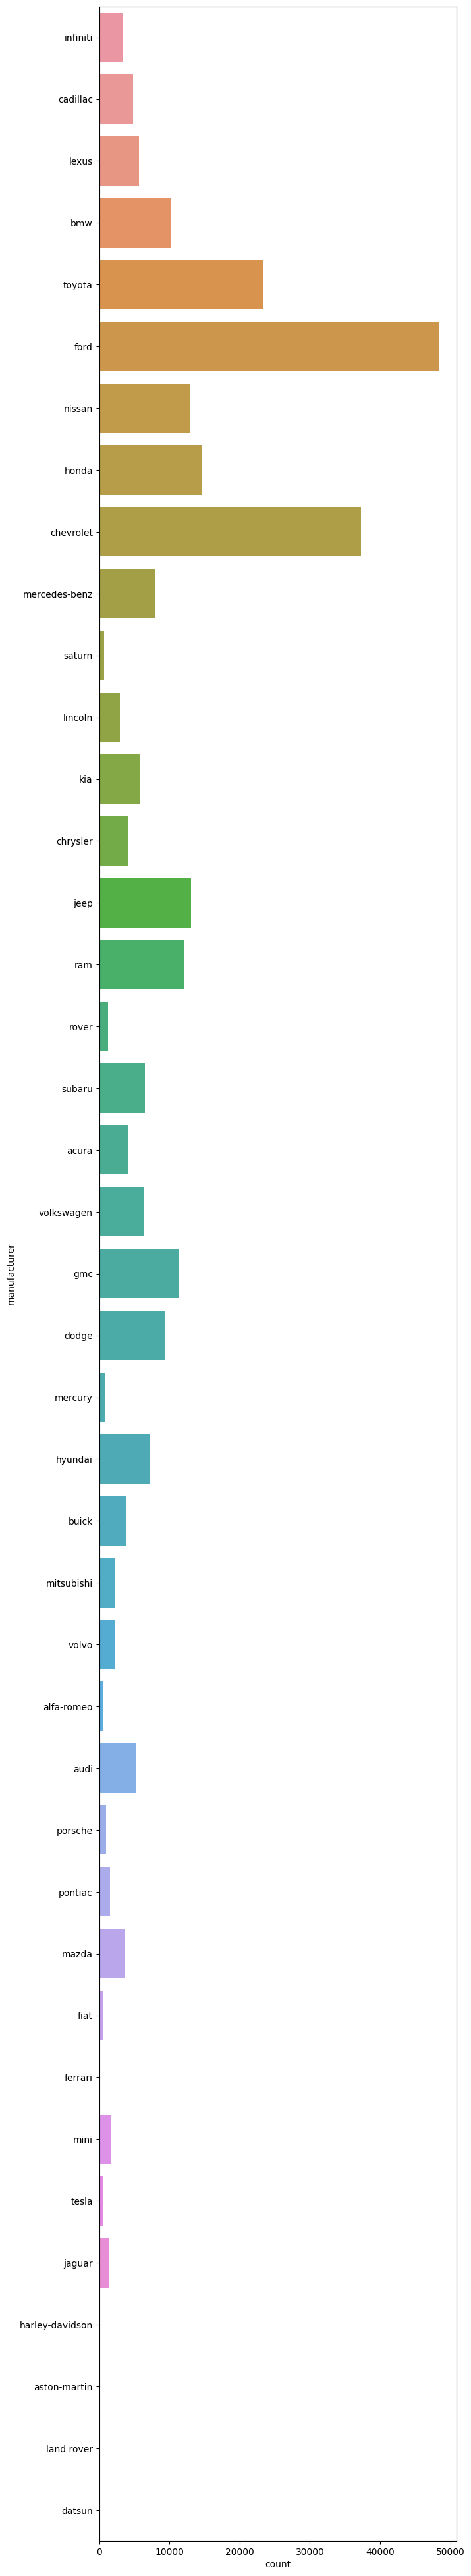

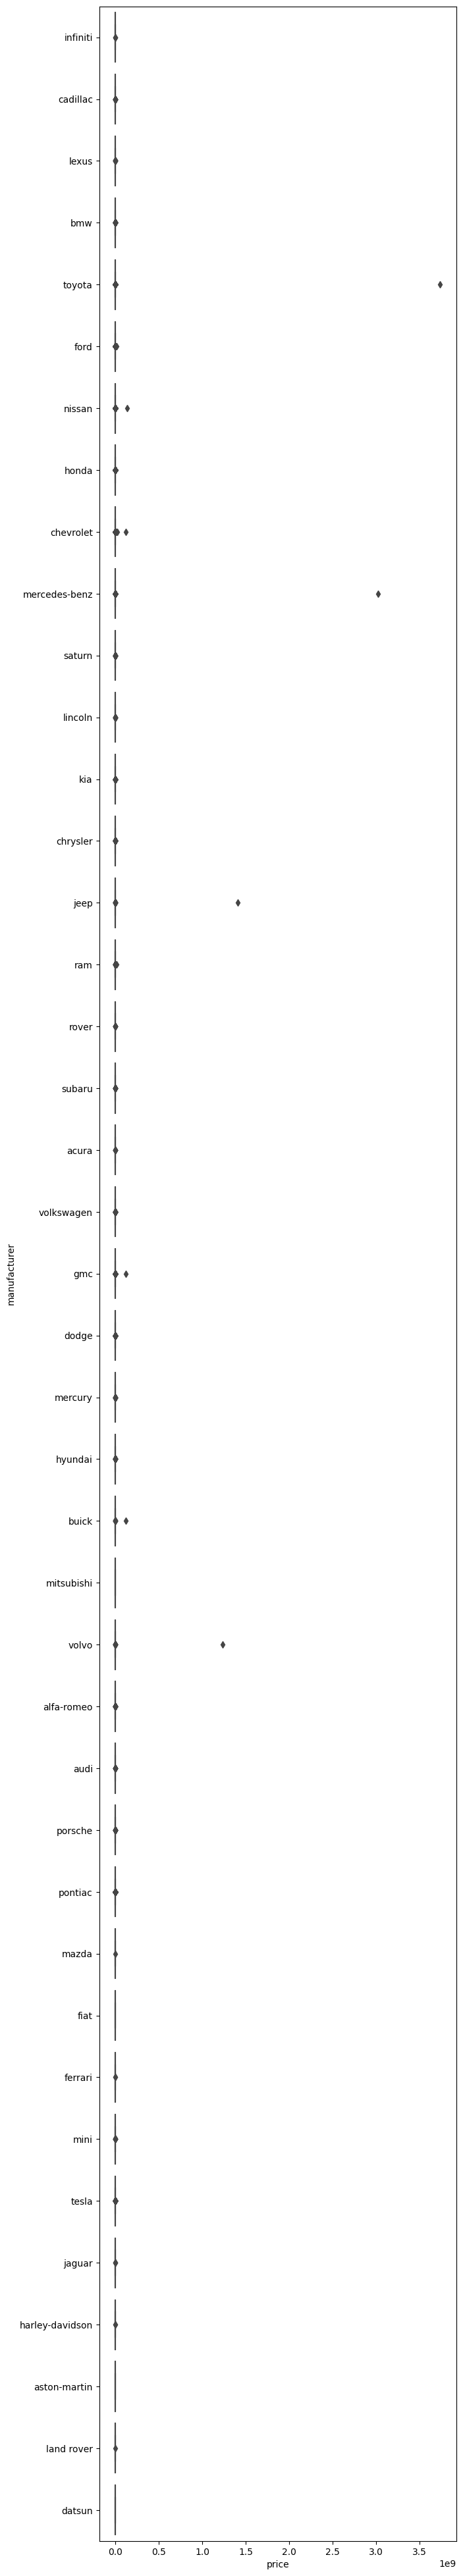

In [9]:
# Number of unique manufacturer
car_df['manufacturer'].nunique()
# Unique manufacturer value counts
car_df['manufacturer'].value_counts()
# Plotting
plt.figure(figsize=(7,50))
sns.countplot(data=car_df,y="manufacturer")
# Model with Price
plt.figure(figsize=(7,50))
sns.boxplot(data=car_df,y="manufacturer",x='price')

Model

In [4]:
# # Number of unique model
# car_df['model'].nunique()
# # Unique model value counts
# car_df['model'].value_counts()
# # Plotting
# plt.figure(figsize=(7,50))
# sns.countplot(data=car_df,y="model")
# # Model with Price
# plt.figure(figsize=(7,50))
# sns.boxplot(data=car_df,y="model",x='price')

Year

c:\Users\Shehan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


KeyboardInterrupt: 

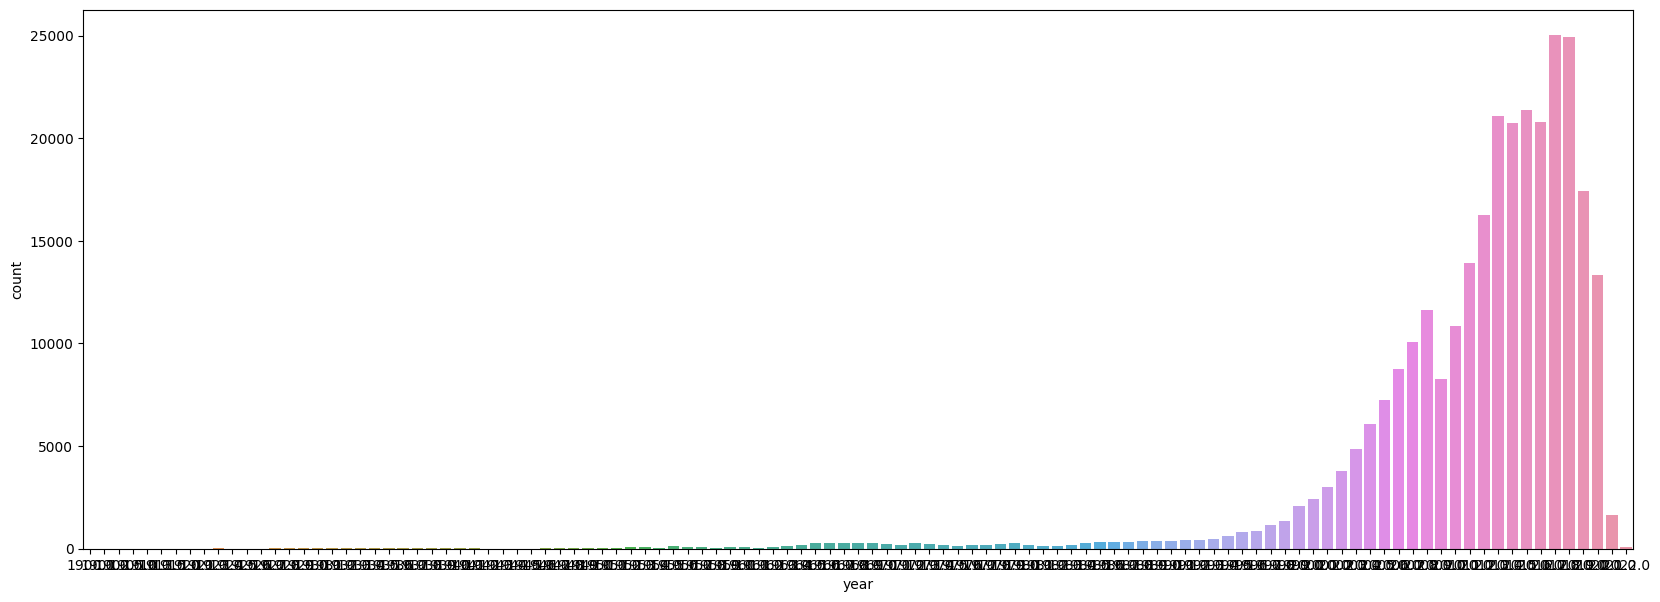

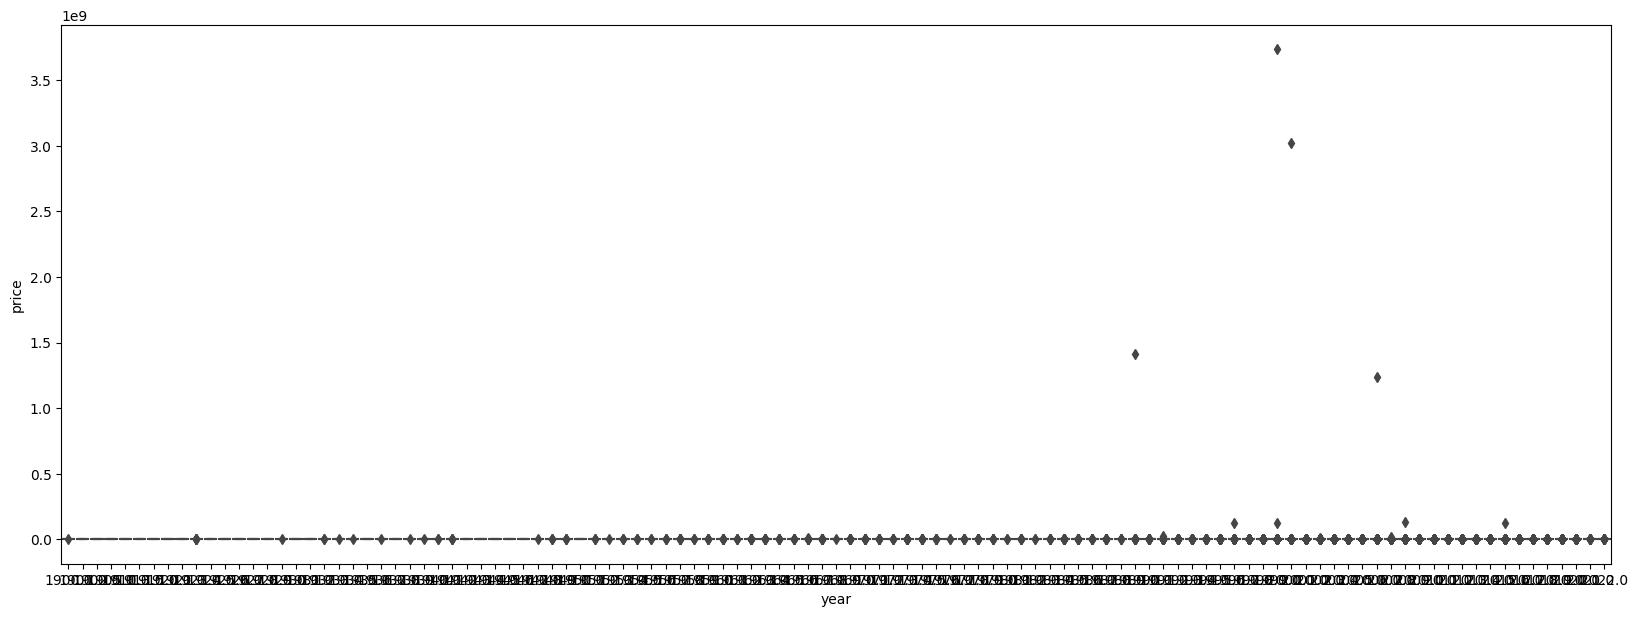

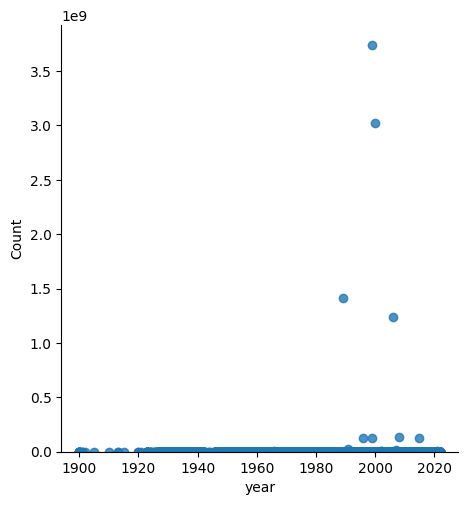

In [10]:
# Number of unique value
car_df['year'].nunique()
# Plotting Year
plt.figure(figsize=(20,7))
sns.countplot(data=car_df,x='year')
# Year with Price
plt.figure(figsize=(20,7))
sns.boxplot(data=car_df,x='year',y="price")
# Distplot 
sns.displot(car_df['year'])
# Regplot Year with Price
sns.regplot(data=car_df,x='year',y='price')

Transmission

<Axes: xlabel='transmission', ylabel='price'>

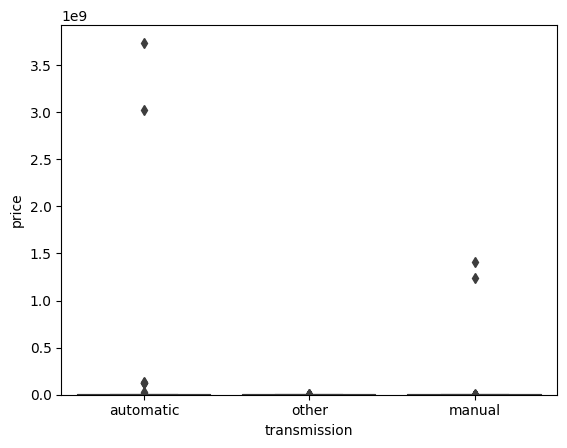

In [12]:
# Number of unique transmission method
car_df['transmission'].nunique()
# Unique values
car_df['transmission'].unique()
# Value counts
car_df['transmission'].value_counts()
# Countplot
sns.countplot(data=car_df,x='transmission')
# Transmisson with Price
sns.boxplot(data=car_df,x='transmission',y='price')

Ordometer

c:\Users\Shehan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


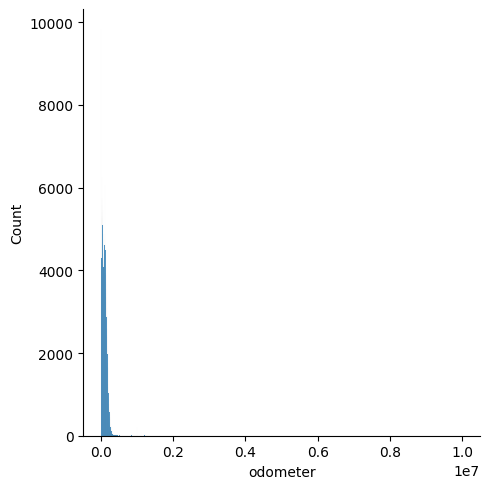

In [19]:
# Number of Unique values
car_df['odometer'].nunique()
# Distplot
sns.displot(car_df['odometer'])

Fuel

Number of unique fuel methods: 5
Unique fuel values: ['gas', 'diesel', 'other', 'hybrid', 'electric', NaN]
Categories (5, object): ['diesel', 'electric', 'gas', 'hybrid', 'other']
Fuel value counts:
 gas         242693
other        20904
diesel       20309
hybrid        3607
electric      1163
Name: fuel, dtype: int64


<Axes: xlabel='fuel', ylabel='price'>

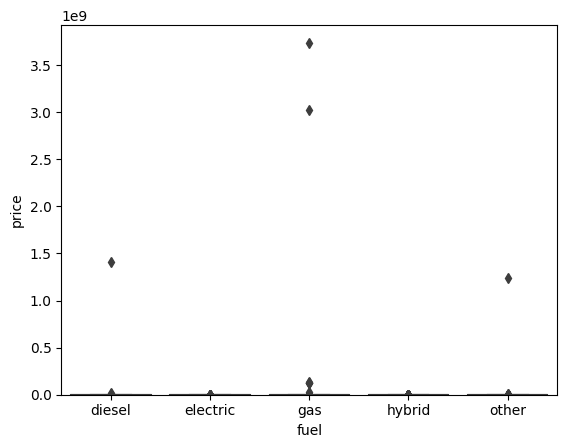

In [23]:
# Convert 'fuel' column to categorical data type
car_df['fuel'] = car_df['fuel'].astype('category')

# Number of unique Fuel methods
num_unique_fuels = car_df['fuel'].nunique()
print("Number of unique fuel methods:", num_unique_fuels)

# Unique fuel values
unique_fuels = car_df['fuel'].unique()
print("Unique fuel values:", unique_fuels)

# Value counts for each fuel type
fuel_value_counts = car_df['fuel'].value_counts()
print("Fuel value counts:\n", fuel_value_counts)

# Countplot
sns.countplot(data=car_df, x='fuel')

# Boxplot showing relationship between fuel type and price
sns.boxplot(data=car_df, x='fuel', y='price')

In [5]:
car_df = df[['id','year','manufacturer','model','fuel','odometer','title_status','condition','type','transmission','drive','paint_color','state','posting_date','price']].copy(deep = True)

In [6]:
# Dataframe with 0 price
df_with_price = car_df[car_df['price']!=0]
df_with_price

,id,year,manufacturer,model,fuel,odometer,title_status,condition,type,transmission,drive,paint_color,state,posting_date,price
0,7309831550,2007.0,infiniti,m45,gas,214740.0,clean,excellent,sedan,automatic,rwd,black,ga,2021-04-20T11:46:13-0400,7995
1,7317007429,2008.0,cadillac,escalade,gas,170276.0,clean,NaN,SUV,automatic,NaN,black,wa,2021-05-04T16:16:32-0700,14999
2,7309202024,2003.0,lexus,es,gas,176910.0,clean,NaN,sedan,automatic,fwd,NaN,nc,2021-04-19T10:07:58-0400,5995
4,7307880118,2008.0,toyota,rav4,gas,138900.0,clean,good,SUV,automatic,4wd,silver,pa,2021-04-16T15:22:02-0400,7995
5,7316502290,2010.0,ford,f150,gas,156700.0,clean,excellent,NaN,automatic,4wd,NaN,ga,2021-05-03T19:31:28-0400,18300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290124,7315304329,2007.0,dodge,charger,gas,1000.0,clean,NaN,NaN,automatic,NaN,NaN,tx,2021-05-01T10:15:37-0500,200
290125,7316875320,2013.0,hyundai,santa fe sport awd,gas,114000.0,clean,good,NaN,automatic,4wd,black,tx,2021-05-04T14:06:55-0500,8900
290126,7313432323,2013.0,NaN,Scion xB,gas,94000.0,clean,excellent,wagon,automatic,fwd,NaN,ia,2021-04-27T13:00:51-0500,7300
290127,7316213204,2009.0,jeep,wrangler,gas,108000.0,clean,good,SUV,automatic,NaN,red,ga,2021-05-03T11:23:11-0400,4500


In [7]:
# Price sorted with year
df_with_price.groupby(df_with_price['year'])['price'].count()

year
1900.0        9
1901.0        3
1902.0        1
1905.0        1
1910.0        1
          ...  
2018.0    22487
2019.0    15789
2020.0    12332
2021.0     1381
2022.0       67
Name: price, Length: 109, dtype: int64

In [8]:
def categorize(price):
    if price >100 and price <500:
        return 'l1'
    elif price>=500 and price<5000:
        return 'l2'
    elif price>=5000 and price<20000:
        return 'n1'
    elif price>=20000 and price<100000:
        return 'n2'
    elif price>=100000 and price<300000:
        return 'g1'
    elif price>=300000 and price<500000:
        return 'g2'
    else:
        return 'anomaly'
df_with_price['price_category'] = df_with_price['price'].apply(categorize)
df_with_price.groupby(df_with_price['price_category'])['price_category'].count()

C:\Users\Shehan\AppData\Local\Temp\ipykernel_12544\185678691.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_price['price_category'] = df_with_price['price'].apply(categorize)


price_category
anomaly      2395
g1            379
g2              5
l1           3847
l2          36126
n1         124877
n2         101356
Name: price_category, dtype: int64

In [9]:
# Creating Dataframe with rows excluding anomaly
normal_car = df_with_price[df_with_price['price_category']!='anomaly']

In [10]:
final_df = normal_car[['id','year','manufacturer','model','odometer','transmission','state','condition','type','paint_color','price','price_category']].copy(deep = True)
final_df

,id,year,manufacturer,model,odometer,transmission,state,condition,type,paint_color,price,price_category
0,7309831550,2007.0,infiniti,m45,214740.0,automatic,ga,excellent,sedan,black,7995,n1
1,7317007429,2008.0,cadillac,escalade,170276.0,automatic,wa,NaN,SUV,black,14999,n1
2,7309202024,2003.0,lexus,es,176910.0,automatic,nc,NaN,sedan,NaN,5995,n1
4,7307880118,2008.0,toyota,rav4,138900.0,automatic,pa,good,SUV,silver,7995,n1
5,7316502290,2010.0,ford,f150,156700.0,automatic,ga,excellent,NaN,NaN,18300,n1
...,...,...,...,...,...,...,...,...,...,...,...,...
290124,7315304329,2007.0,dodge,charger,1000.0,automatic,tx,NaN,NaN,NaN,200,l1
290125,7316875320,2013.0,hyundai,santa fe sport awd,114000.0,automatic,tx,good,NaN,black,8900,n1
290126,7313432323,2013.0,NaN,Scion xB,94000.0,automatic,ia,excellent,wagon,NaN,7300,n1
290127,7316213204,2009.0,jeep,wrangler,108000.0,automatic,ga,good,SUV,red,4500,l2


In [11]:
df_main =  final_df[['year','manufacturer','model','odometer','transmission','state','condition','type','paint_color','price','price_category']].copy(deep = True)
df_main

,year,manufacturer,model,odometer,transmission,state,condition,type,paint_color,price,price_category
0,2007.0,infiniti,m45,214740.0,automatic,ga,excellent,sedan,black,7995,n1
1,2008.0,cadillac,escalade,170276.0,automatic,wa,NaN,SUV,black,14999,n1
2,2003.0,lexus,es,176910.0,automatic,nc,NaN,sedan,NaN,5995,n1
4,2008.0,toyota,rav4,138900.0,automatic,pa,good,SUV,silver,7995,n1
5,2010.0,ford,f150,156700.0,automatic,ga,excellent,NaN,NaN,18300,n1
...,...,...,...,...,...,...,...,...,...,...,...
290124,2007.0,dodge,charger,1000.0,automatic,tx,NaN,NaN,NaN,200,l1
290125,2013.0,hyundai,santa fe sport awd,114000.0,automatic,tx,good,NaN,black,8900,n1
290126,2013.0,NaN,Scion xB,94000.0,automatic,ia,excellent,wagon,NaN,7300,n1
290127,2009.0,jeep,wrangler,108000.0,automatic,ga,good,SUV,red,4500,l2


In [12]:
# Grouping by dataframe
df_main.groupby(df_main['condition'])['condition'].count()

condition
excellent    64285
fair          4489
good         82545
like new     13638
new            779
salvage        390
Name: condition, dtype: int64

In [13]:
avg_price_by_condition = df_main.groupby('condition')['price'].median()
mean_price_excellent_condition = avg_price_by_condition.get('excellent', 0)  
print( mean_price_excellent_condition)

11995.0


Plotting distribution of car prices for a different condition

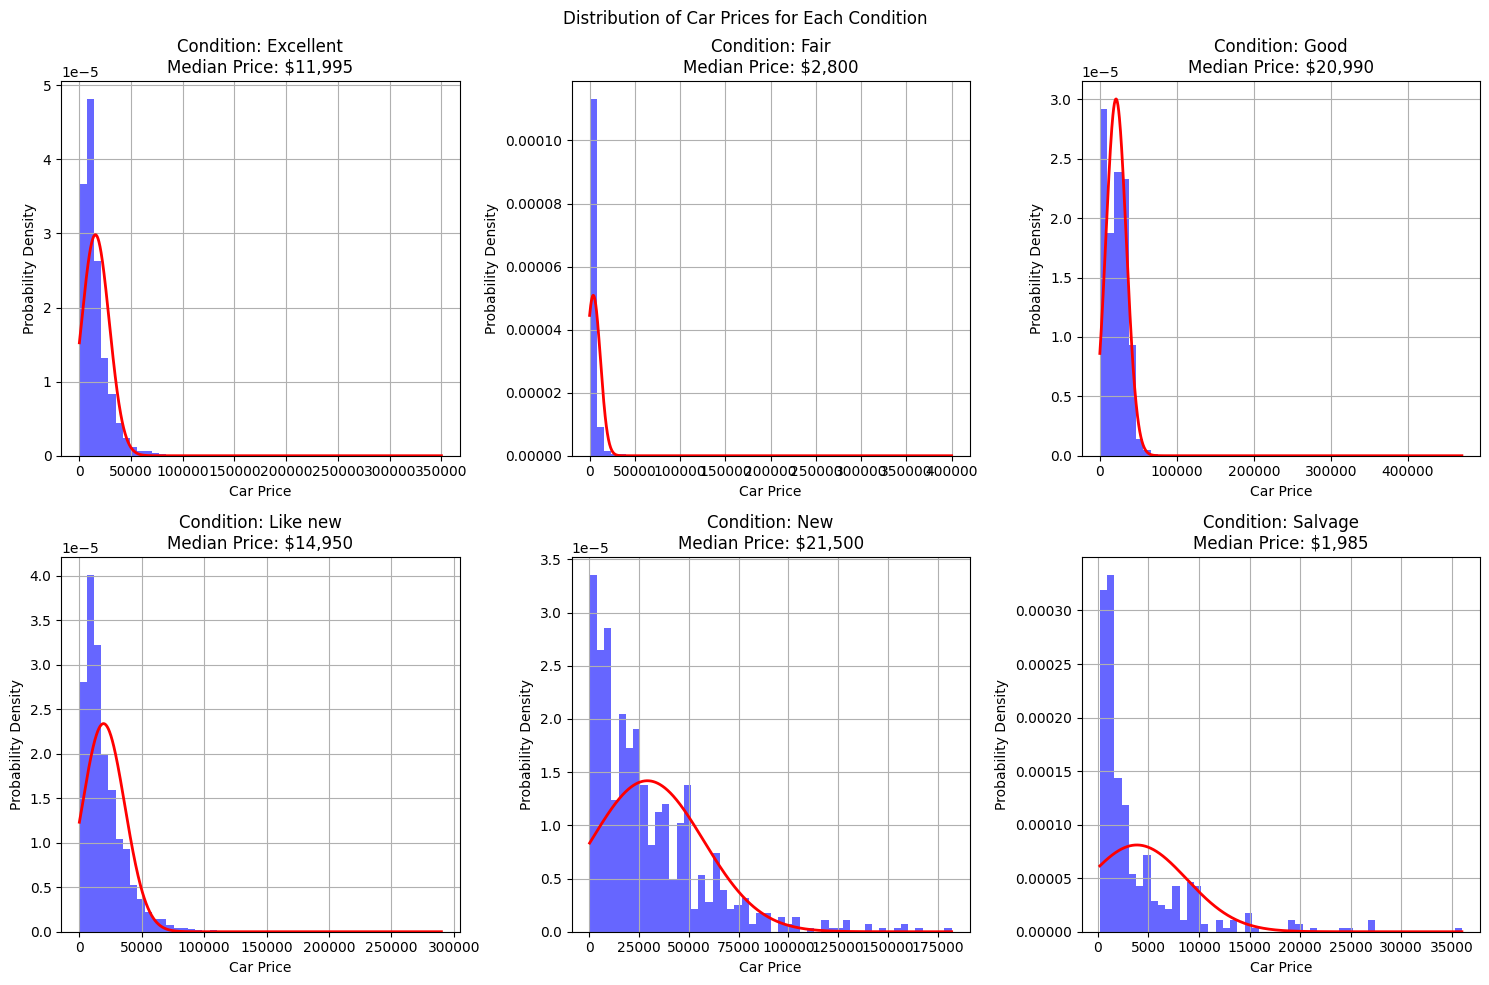

In [59]:
# Data for each condition (median prices)
conditions = ['excellent', 'fair', 'good', 'like new', 'new', 'salvage']
median_prices = [11995, 2800, 20990, 14950, 21500, 1985]

# Create a subplot for each condition
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Car Prices for Each Condition')

for i, ax in enumerate(axs.flat):
    condition = conditions[i]
    median_price = median_prices[i]
    
    # Filter data for the current condition
    condition_data = df_main[df_main['condition'] == condition]['price']
    
    # Create the histogram
    ax.hist(condition_data, bins=50, density=True, alpha=0.6, color='b')
    
    # Calculate mean and standard deviation of car prices for the current condition
    mean_price = condition_data.mean()
    std_deviation_price = condition_data.std()
    
    # Calculate PDF for normal distribution
    x = np.linspace(condition_data.min(), condition_data.max(), 1000)
    pdf = (1 / (std_deviation_price * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_price) / std_deviation_price) ** 2)
    ax.plot(x, pdf, 'r', linewidth=2)
    
    # Customize the plot for each condition
    ax.set_xlabel('Car Price')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'Condition: {condition.capitalize()}\nMedian Price: ${median_price:,}')
    ax.grid(True)

plt.tight_layout()
plt.show()

Plotting distribution of car prices for a different condition along with median line

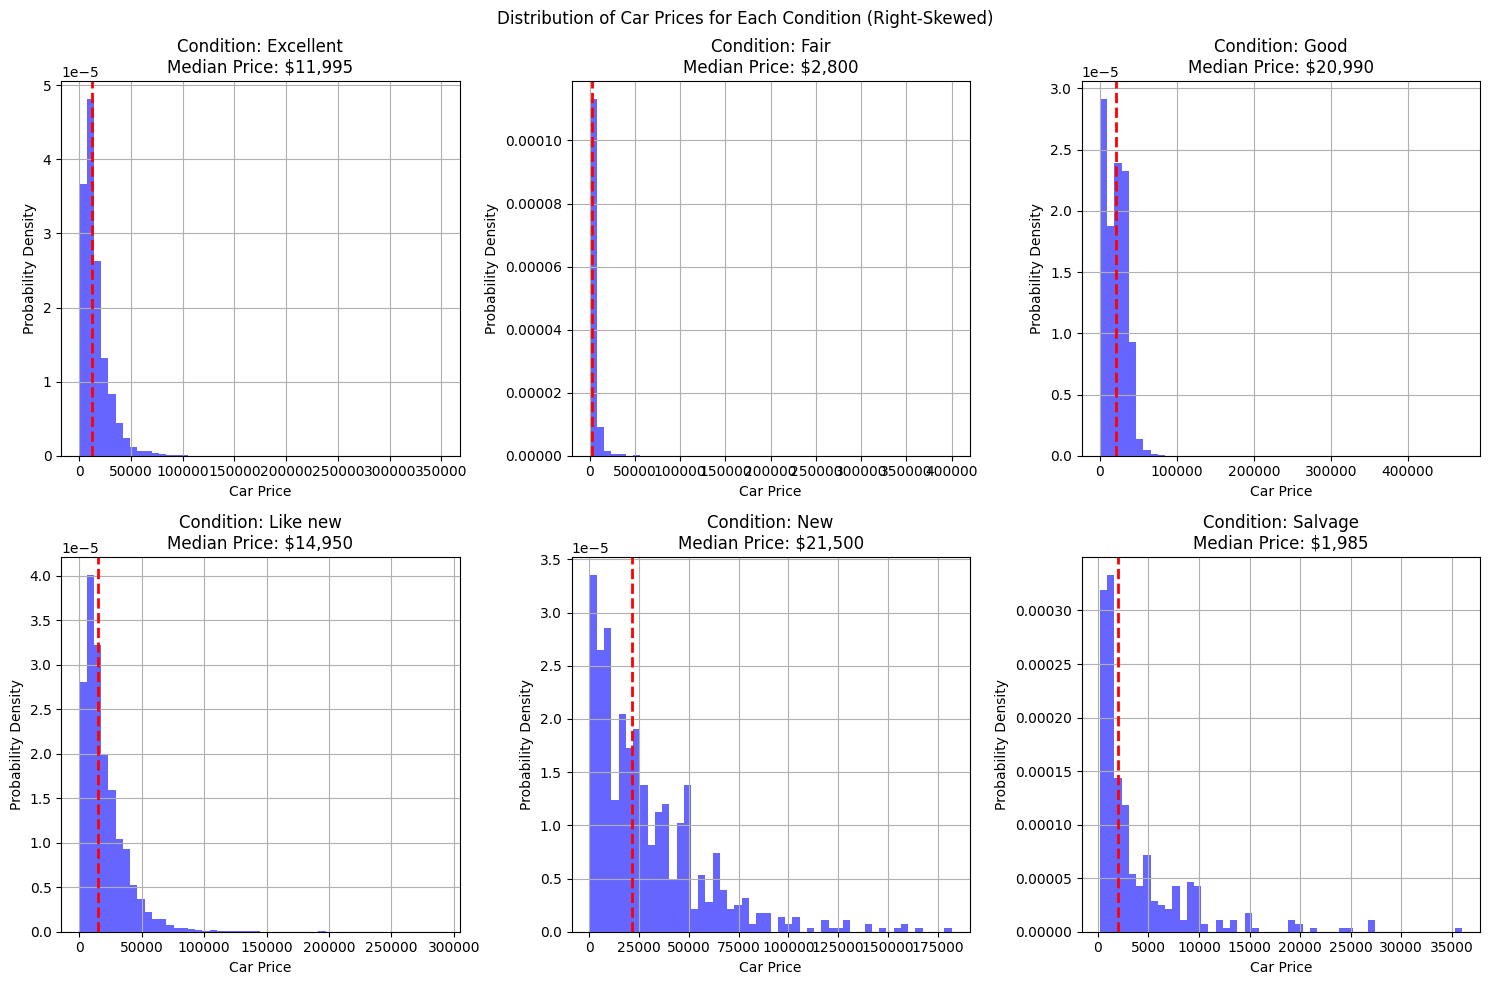

In [20]:
# Data for each condition (median prices)
conditions = ['excellent', 'fair', 'good', 'like new', 'new', 'salvage']
median_prices = [11995, 2800, 20990, 14950, 21500, 1985]

# Create a subplot for each condition
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Car Prices for Each Condition (Right-Skewed)')

for i, ax in enumerate(axs.flat):
    condition = conditions[i]
    median_price = median_prices[i]
    
    # Filter data for the current condition
    condition_data = df_main[df_main['condition'] == condition]['price']
    
    # Create the histogram
    ax.hist(condition_data, bins=50, density=True, alpha=0.6, color='b')
    
    # Plot the median as a vertical line
    ax.axvline(median_price, color='r', linestyle='dashed', linewidth=2)
    
    # Customize the plot for each condition
    ax.set_xlabel('Car Price')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'Condition: {condition.capitalize()}\nMedian Price: ${median_price:,}')
    ax.grid(True)

plt.tight_layout()
plt.show()

Imputing missing values for condition column

In [14]:
def fill_condition_based_on_price(df):
    # Calculate average and median prices for each condition
    avg_prices_by_condition = df.groupby('condition')['price'].mean()
    median_prices_by_condition = df.groupby('condition')['price'].median()

    # Fill NaN values in 'condition' column based on price ranges
    for index, row in df.iterrows():
        if pd.isna(row['condition']):
            price = row['price']
            
            # Find the condition with the closest median price to the car's price
            closest_condition = (median_prices_by_condition - price).abs().idxmin()
            
            # If the car's price is within 20% of the average price of the closest condition, assign the condition
            if 0.8 * avg_prices_by_condition[closest_condition] <= price <= 1.2 * avg_prices_by_condition[closest_condition]:
                df.at[index, 'condition'] = closest_condition
            else:
                # If the price is outside the 20% range, assign the closest condition based on median price
                df.at[index, 'condition'] = closest_condition

    return df

# Assuming df_main is your DataFrame containing 'price' and 'condition' columns
df_main = fill_condition_based_on_price(df_main)

# Verify the NaN values in the 'condition' column after the update
print(df_main.isnull().sum())


year                  0
manufacturer      10189
model                 0
odometer              0
transmission          0
state                 0
condition             0
type              57085
paint_color       77962
price                 0
price_category        0
dtype: int64


In [15]:
# Creating new dataframe and converting year & odometer fields to int
df_main_final = df_main[['year','manufacturer','model','odometer','transmission','state','paint_color','condition','price']].copy(deep =  True)
df_main_final['year'] = df_main_final['year'].astype('int')
df_main_final['odometer'] = df_main_final['odometer'].astype('int')

In [16]:
df_main_final

,year,manufacturer,model,odometer,transmission,state,paint_color,condition,price
0,2007,infiniti,m45,214740,automatic,ga,black,excellent,7995
1,2008,cadillac,escalade,170276,automatic,wa,black,like new,14999
2,2003,lexus,es,176910,automatic,nc,NaN,fair,5995
4,2008,toyota,rav4,138900,automatic,pa,silver,good,7995
5,2010,ford,f150,156700,automatic,ga,NaN,excellent,18300
...,...,...,...,...,...,...,...,...,...
290124,2007,dodge,charger,1000,automatic,tx,NaN,salvage,200
290125,2013,hyundai,santa fe sport awd,114000,automatic,tx,black,good,8900
290126,2013,NaN,Scion xB,94000,automatic,ia,NaN,excellent,7300
290127,2009,jeep,wrangler,108000,automatic,ga,red,good,4500


Removing null rows

In [17]:
df_main_final = df_main_final.dropna()
print(df_main_final.isnull().sum())
df_main_final

year            0
manufacturer    0
model           0
odometer        0
transmission    0
state           0
paint_color     0
condition       0
price           0
dtype: int64


,year,manufacturer,model,odometer,transmission,state,paint_color,condition,price
0,2007,infiniti,m45,214740,automatic,ga,black,excellent,7995
1,2008,cadillac,escalade,170276,automatic,wa,black,like new,14999
4,2008,toyota,rav4,138900,automatic,pa,silver,good,7995
8,2012,toyota,sienna,157653,automatic,ny,grey,excellent,11995
9,2016,ford,f-150 xlt fx4,40000,automatic,fl,grey,like new,43000
...,...,...,...,...,...,...,...,...,...
290121,2015,tesla,model s,56004,automatic,dc,black,excellent,45500
290122,2010,chevrolet,corvette grand sport,56302,other,ga,red,good,37990
290125,2013,hyundai,santa fe sport awd,114000,automatic,tx,black,good,8900
290127,2009,jeep,wrangler,108000,automatic,ga,red,good,4500


Encoding categorical values

In [18]:
final_df = df_main_final
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
final_df['model'] = labelencoder.fit_transform(final_df['model'].values)
final_df['manufacturer'] = labelencoder.fit_transform(final_df['manufacturer'].values)
final_df['paint_color'] = labelencoder.fit_transform(final_df['paint_color'].values)
final_df['transmission'] = labelencoder.fit_transform(final_df['transmission'].values)
final_df['state'] = labelencoder.fit_transform(final_df['state'].values)
final_df['condition'] = labelencoder.fit_transform(final_df['condition'].values)

final_df

C:\Users\Shehan\AppData\Local\Temp\ipykernel_12544\3677466441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['model'] = labelencoder.fit_transform(final_df['model'].values)
C:\Users\Shehan\AppData\Local\Temp\ipykernel_12544\3677466441.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['manufacturer'] = labelencoder.fit_transform(final_df['manufacturer'].values)
C:\Users\Shehan\AppData\Local\Temp\ipykernel_12544\3677466441.py:6: SettingWithCopyWarning: 
A value is trying to be set on 

,year,manufacturer,model,odometer,transmission,state,paint_color,condition,price
0,2007,18,8785,214740,0,10,0,0,7995
1,2008,6,5305,170276,0,47,0,3,14999
4,2008,38,10600,138900,0,38,9,2,7995
8,2012,38,11529,157653,0,34,5,0,11995
9,2016,13,5886,40000,0,9,5,3,43000
...,...,...,...,...,...,...,...,...,...
290121,2015,37,9226,56004,0,7,0,0,45500
290122,2010,7,3985,56302,2,10,8,2,37990
290125,2013,17,11295,114000,0,43,0,2,8900
290127,2009,20,14068,108000,0,10,8,2,4500


Experimenting with different ML algorithms to by checking MSE and R2 value

Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = final_df[['year', 'manufacturer', 'model', 'condition', 'odometer', 'transmission', 'paint_color', 'state']]
y = final_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 152634973.4039847
R-squared: 0.29858657912525055


XGBoost

In [72]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = final_df[['year', 'manufacturer', 'model', 'condition', 'odometer', 'transmission', 'paint_color', 'state']]
y = final_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Create and train the XGBoost regressor
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 27300572.659293573
R-squared: 0.8673122619461001


Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = final_df[['year', 'manufacturer', 'model', 'condition', 'odometer', 'transmission', 'paint_color', 'state']]
y = final_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Create and train the Random Forest regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 21764558.53611048
R-squared: 0.8942187009064401


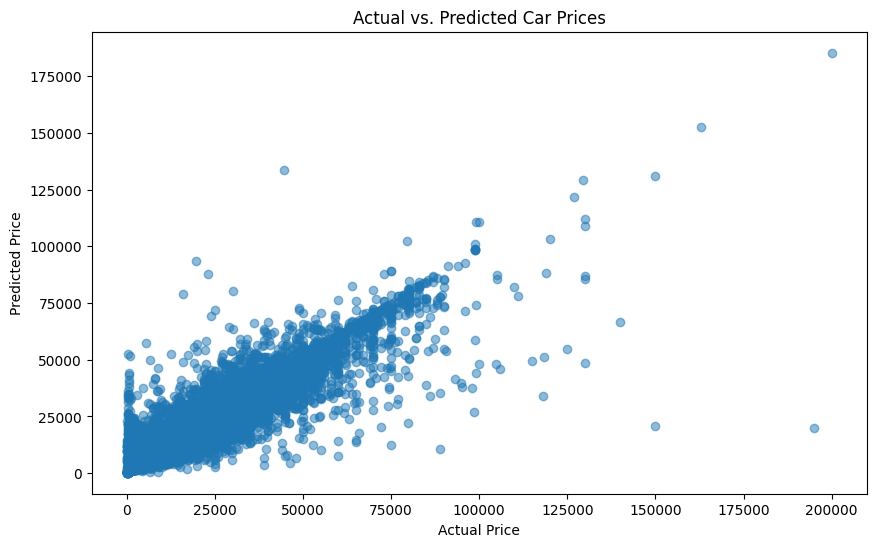

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Car Prices')
plt.show()


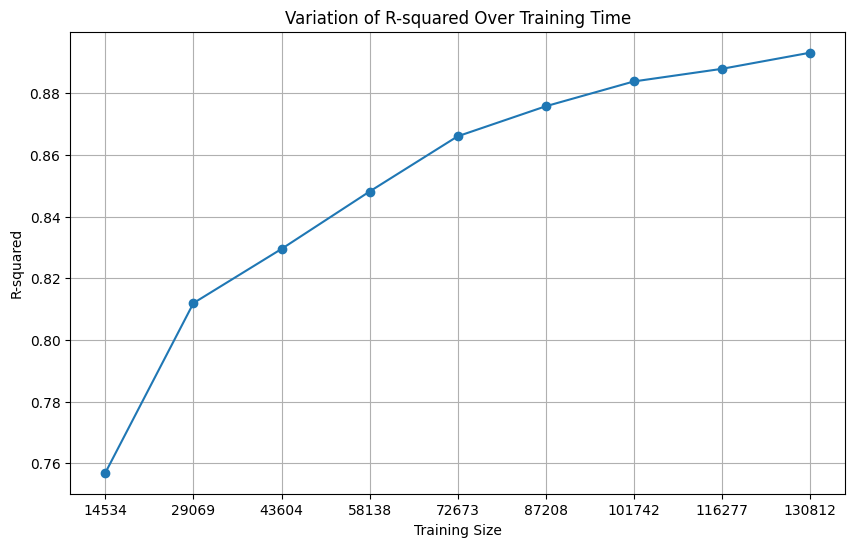

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've already split the data into X_train, X_test, y_train, and y_test

# Create lists to store training sizes and corresponding R2 scores
training_sizes = []
r2_scores = []

# Vary training size from 10% to 90% of the total training data
for percent in range(10, 100, 10):
    percent /= 100.0
    training_size = int(X_train.shape[0] * percent)
    
    # Train the model on a subset of the training data
    rf = RandomForestRegressor()
    rf.fit(X_train[:training_size], y_train[:training_size])
    
    # Make predictions on the test set
    y_pred = rf.predict(X_test)
    
    # Calculate R-squared and store the results
    r2 = r2_score(y_test, y_pred)
    training_sizes.append(training_size)
    r2_scores.append(r2)

# Create a plot of R2 scores over training sizes
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, r2_scores, marker='o')
plt.xlabel('Training Size')
plt.ylabel('R-squared')
plt.title('Variation of R-squared Over Training Time')
plt.xticks(training_sizes)
plt.grid(True)
plt.show()


Neural Networks

In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

# Load your DataFrame, perform preprocessing, and split data
# Assuming df_main_final contains your preprocessed DataFrame
X = df_main_final[['year', 'manufacturer', 'model', 'condition', 'odometer', 'transmission', 'paint_color', 'state']]
y = df_main_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Epoch 1/50
4543/4543 [==============================] - 10s 2ms/step - loss: 199676688.0000
Epoch 2/50
4543/4543 [==============================] - 10s 2ms/step - loss: 114814480.0000
Epoch 3/50
4543/4543 [==============================] - 17s 4ms/step - loss: 112328960.0000
Epoch 4/50
4543/4543 [==============================] - 15s 3ms/step - loss: 111303504.0000
Epoch 5/50
4543/4543 [==============================] - 10s 2ms/step - loss: 110439672.0000
Epoch 6/50
4543/4543 [==============================] - 11s 2ms/step - loss: 109772464.0000
Epoch 7/50
4543/4543 [==============================] - 9s 2ms/step - loss: 109170704.0000
Epoch 8/50
4543/4543 [==============================] - 8s 2ms/step - loss: 108658008.0000
Epoch 9/50
4543/4543 [==============================] - 9s 2ms/step - loss: 108190952.0000
Epoch 10/50
4543/4543 [==============================] - 8s 2ms/step - loss: 107790784.0000
Epoch 11/50
4543/4543 [==============================] - 11s 2ms/step - loss: 10746

DecisionTreeRegressor

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = final_df[['year', 'manufacturer', 'model', 'condition', 'odometer', 'transmission', 'paint_color', 'state']]
y = final_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Create and train the Decision Tree regressor
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 41914788.50454045
R-squared: 0.7962834499084465


SVM Support Vector Machine

In [80]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X = final_df[['year', 'manufacturer', 'model', 'condition', 'odometer', 'transmission', 'paint_color', 'state']]
y = final_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM regressor
svm_regressor = SVR(kernel='linear')  # You can also try 'rbf' or other kernels
svm_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_regressor.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 185804462.3805622
R-squared: 0.14616066904138814


Saving the model with highest score (RFT Model)

In [27]:
import joblib
# Save the trained model to a file
model_filename = 'random_forest_model.pkl'
joblib.dump(rf, model_filename)
print("Model saved as", model_filename)

Model saved as random_forest_model.pkl


Using the model for testing

In [46]:
model_filename = 'random_forest_model.pkl'
# Load the trained model
loaded_rf = joblib.load(model_filename)

# Get user input for prediction
user_input = {
    'year': int(input("Enter the car's manufacturing year: ")),
    'manufacturer': int(input("Enter the car's manufacturer : ")),
    'model': int(input("Enter the model (encoded value): ")),
    'condition': int(input("Enter the car's condition : ")),
    'odometer': int(input("Enter the odometer reading: ")),
    'transmission': int(input("Enter the transmission type (encoded value): ")),
    'paint_color': int(input("Enter the car's Paint : ")),
    'state': int(input("Enter the state (encoded value): "))
}

# Predict car price using the loaded model and user input
predicted_price = loaded_rf.predict([list(user_input.values())])
print("Predicted Car Price:", predicted_price[0])

Predicted Car Price: 7995.0


c:\Users\Shehan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


working method

In [57]:
from sklearn.preprocessing import LabelEncoder
import joblib
import pandas as pd

# Load the trained model
model_filename = 'random_forest_model.pkl'
loaded_rf = joblib.load(model_filename)

# Instantiate LabelEncoder for encoding user input
le = LabelEncoder()

# User input values as a list
user_input_list = [
    int(input("Enter the car's manufacturing year: ")),
    input("Enter the car's manufacturer: "),
    input("Enter the model: "),
    input("Enter the car's condition: "),
    int(input("Enter the odometer reading: ")),
    input("Enter the transmission type: "),
    input("Enter the car's Paint: "),
    input("Enter the state: ")
]

# Indices to apply LabelEncoder
selected_indices = [1, 2, 3, 5, 6, 7]

# Encode specific user input values using LabelEncoder
le.fit(user_input_list)
for i in selected_indices:
    user_input_list[i] = le.transform([user_input_list[i]])[0]

user_input_list

# Make predictions using the loaded model
predictions = loaded_rf.predict([user_input_list])

msg_res = {"Car Price : " + str(predictions[0])}
print(msg_res)

{'Car Price : 2857.68'}


c:\Users\Shehan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Creating new random forest model for sample testing without condition, manufacturer, paintcolor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = final_df[['year', 'model', 'odometer', 'transmission', 'state']]
y = final_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Create and train the Random Forest regressor
rt = RandomForestRegressor()
rt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rt.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Creating submission file part

In [28]:
dt = pd.read_csv('dataset/test.csv')
dt

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,316575,7313399730,2018.0,honda,civic,NaN,4 cylinders,gas,28898.0,clean,automatic,fwd,NaN,sedan,NaN,or,44.971430,-123.018548,2021-04-27T10:09:18-0700
1,97903,7308035814,2017.0,cadillac,cts 2.0 luxury sedan 4d,good,NaN,gas,41147.0,clean,other,NaN,NaN,sedan,red,fl,28.040000,-81.960000,2021-04-16T20:21:00-0400
2,357880,7317063645,2006.0,toyota,sienna,excellent,6 cylinders,gas,165500.0,clean,automatic,NaN,NaN,mini-van,grey,tx,32.737108,-97.084585,2021-05-04T20:45:23-0500
3,413008,7310376764,2016.0,mitsubishi,outlander sel sport,good,NaN,other,29430.0,clean,other,NaN,NaN,SUV,white,wi,43.700000,-87.740000,2021-04-21T11:20:50-0500
4,330300,7309848062,2017.0,audi,a6 3.0t premium plus sedan,good,6 cylinders,gas,24238.0,clean,automatic,NaN,NaN,sedan,white,pa,40.790000,-77.850000,2021-04-20T12:10:51-0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124336,221602,7306681704,2015.0,ram,3500,excellent,6 cylinders,diesel,123000.0,clean,automatic,rwd,NaN,NaN,white,mt,48.202800,-114.303900,2021-04-14T09:29:57-0600
124337,353429,7315798680,2007.0,nissan,murano.awd,NaN,NaN,gas,150000.0,rebuilt,automatic,NaN,NaN,NaN,NaN,tx,30.242800,-97.765800,2021-05-02T11:47:54-0500
124338,284120,7314818147,2015.0,dodge,dart sxt,excellent,4 cylinders,gas,90430.0,clean,automatic,fwd,NaN,NaN,white,oh,41.563600,-81.573300,2021-04-30T11:22:19-0400
124339,273569,7308055654,2001.0,chevrolet,2500,NaN,NaN,gas,137000.0,clean,automatic,NaN,NaN,NaN,NaN,ny,42.190134,-78.041382,2021-04-16T21:15:13-0400


In [29]:
car_dt = dt[['id','year', 'model', 'odometer', 'transmission', 'state']].copy(deep = True)
car_dt

,id,year,model,odometer,transmission,state
0,7313399730,2018.0,civic,28898.0,automatic,or
1,7308035814,2017.0,cts 2.0 luxury sedan 4d,41147.0,other,fl
2,7317063645,2006.0,sienna,165500.0,automatic,tx
3,7310376764,2016.0,outlander sel sport,29430.0,other,wi
4,7309848062,2017.0,a6 3.0t premium plus sedan,24238.0,automatic,pa
...,...,...,...,...,...,...
124336,7306681704,2015.0,3500,123000.0,automatic,mt
124337,7315798680,2007.0,murano.awd,150000.0,automatic,tx
124338,7314818147,2015.0,dart sxt,90430.0,automatic,oh
124339,7308055654,2001.0,2500,137000.0,automatic,ny


In [26]:
car_dt.isnull().sum()

id              0
year            0
model           0
odometer        0
transmission    0
state           0
dtype: int64

In [30]:
dt_main_final = car_dt.dropna()
print(dt_main_final.isnull().sum())

id              0
year            0
model           0
odometer        0
transmission    0
state           0
dtype: int64


In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
car_dt['model'] = labelencoder.fit_transform(car_dt['model'].values)
car_dt['transmission'] = labelencoder.fit_transform(car_dt['transmission'].values)
car_dt['state'] = labelencoder.fit_transform(car_dt['state'].values)

car_dt

,id,year,model,odometer,transmission,state
0,7313399730,2018.0,4903,28898.0,0,37
1,7308035814,2017.0,5636,41147.0,2,9
2,7317063645,2006.0,12388,165500.0,0,43
3,7310376764,2016.0,10756,29430.0,2,48
4,7309848062,2017.0,3323,24238.0,0,38
...,...,...,...,...,...,...
124336,7306681704,2015.0,1246,123000.0,0,26
124337,7315798680,2007.0,10343,150000.0,0,43
124338,7314818147,2015.0,5831,90430.0,0,35
124339,7308055654,2001.0,814,137000.0,0,34


In [ ]:
car_dt['year'] = car_dt['year'].astype('int')
car_dt['odometer'] = car_dt['odometer'].astype('int')
car_dt

In [32]:
datatest = car_dt[['year', 'model', 'odometer', 'transmission', 'state']]
result = rt.predict(datatest)
car_dt['target'] = result
car_dt_final = car_dt[['id','target']]
car_dt_final

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- condition
- manufacturer
- paint_color


In [ ]:
car_dt_final['Target']= car_dt_final['target'].astype('int')
car_dt_final

In [ ]:
# Saving the submission file
car_dt_final[['id','Target']].to_csv('submission.csv', index = False)